
Analyzing Benin Dataset:

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000     

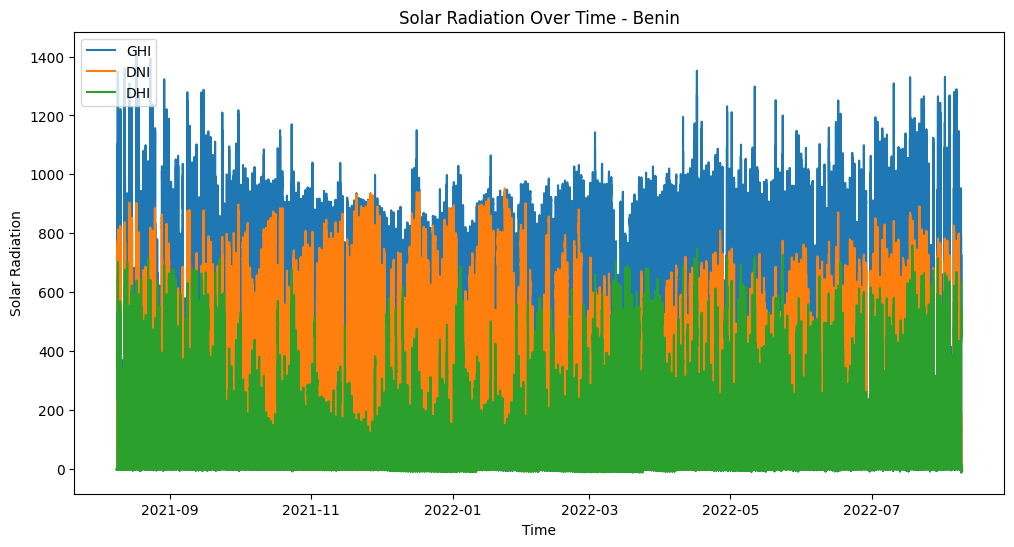

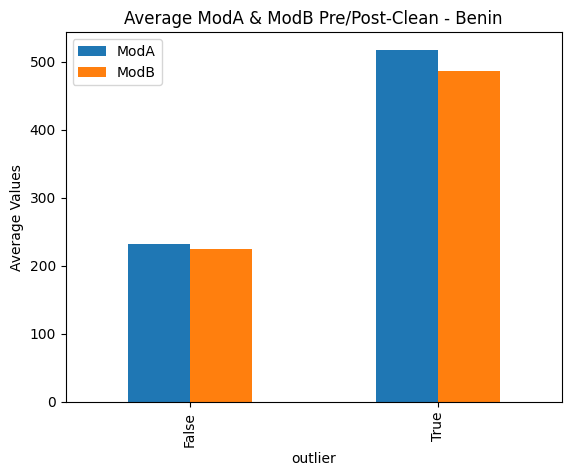

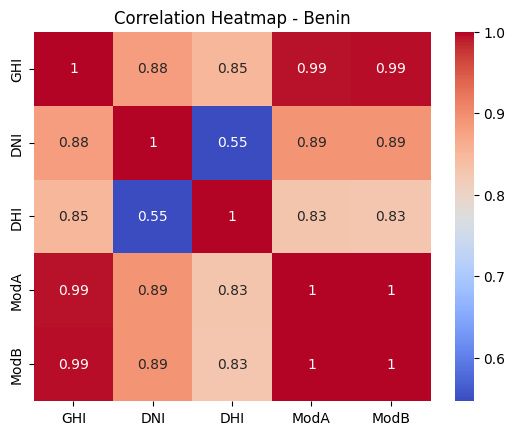

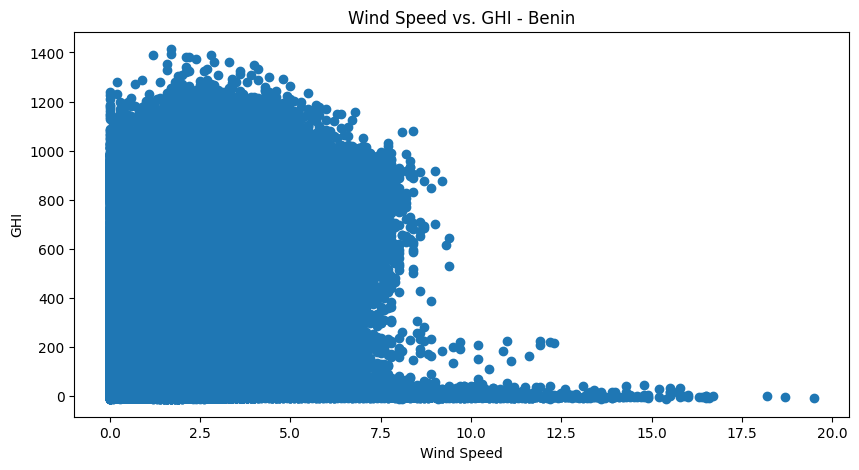

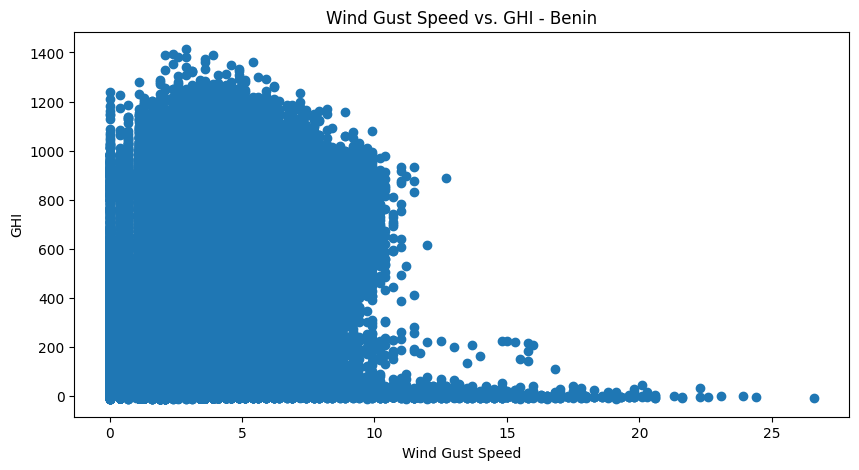

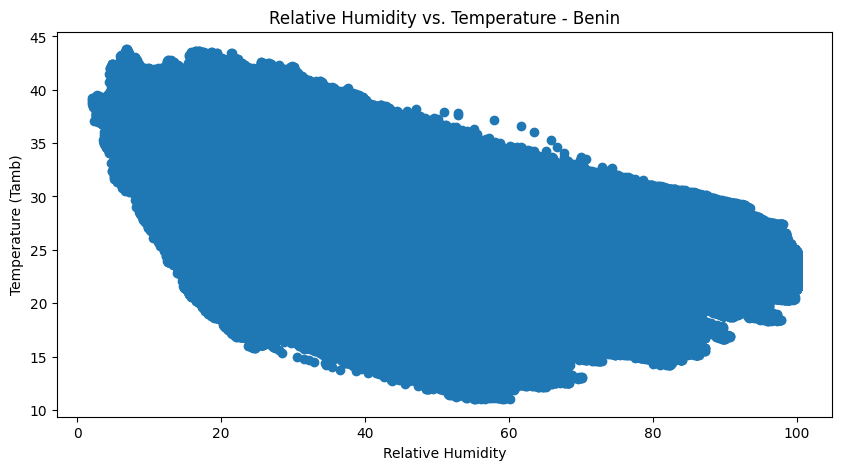

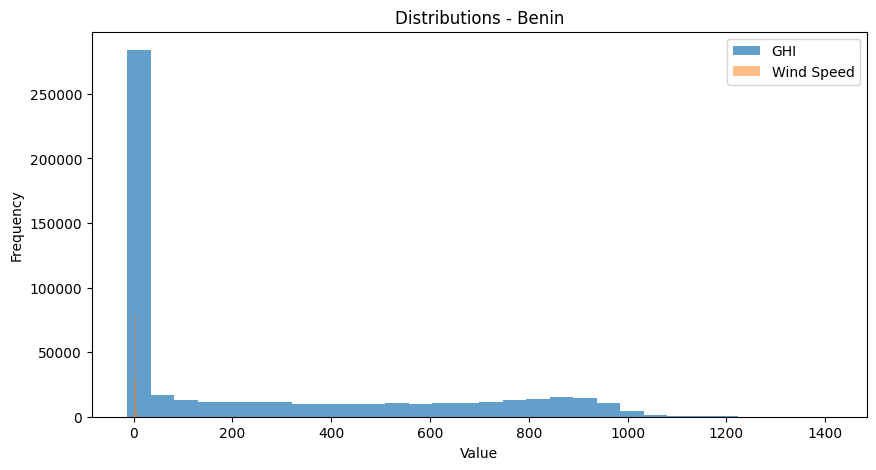

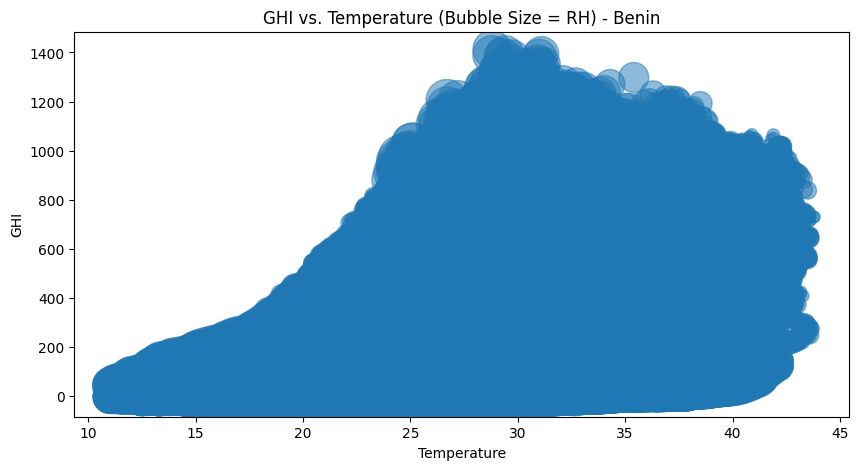


Analyzing Sierraleone Dataset:

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.90000

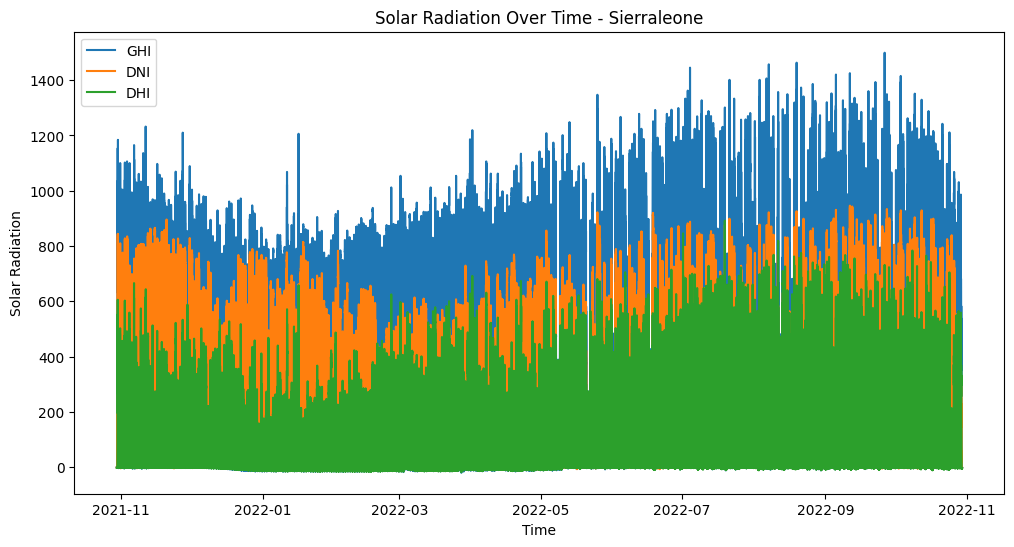

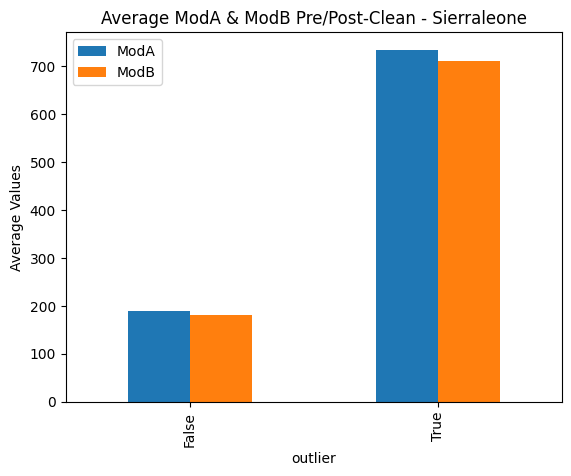

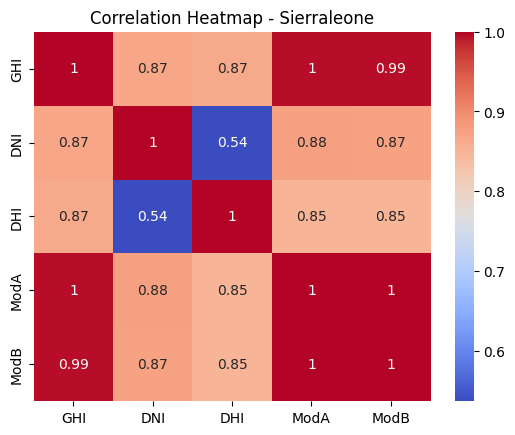

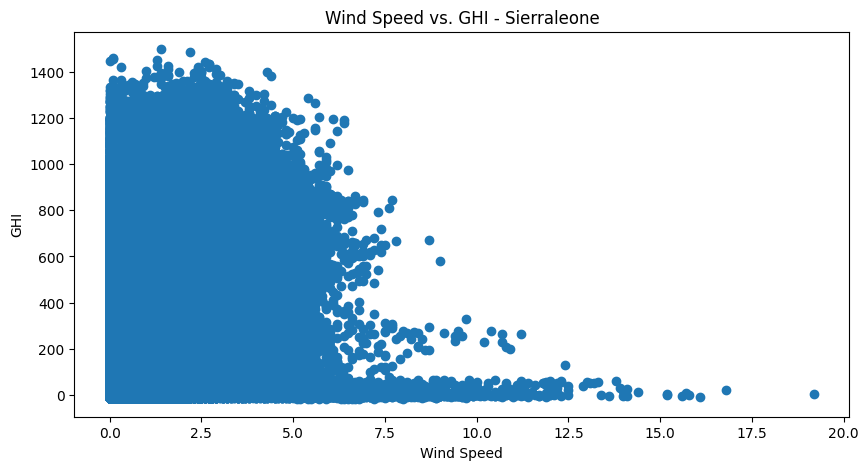

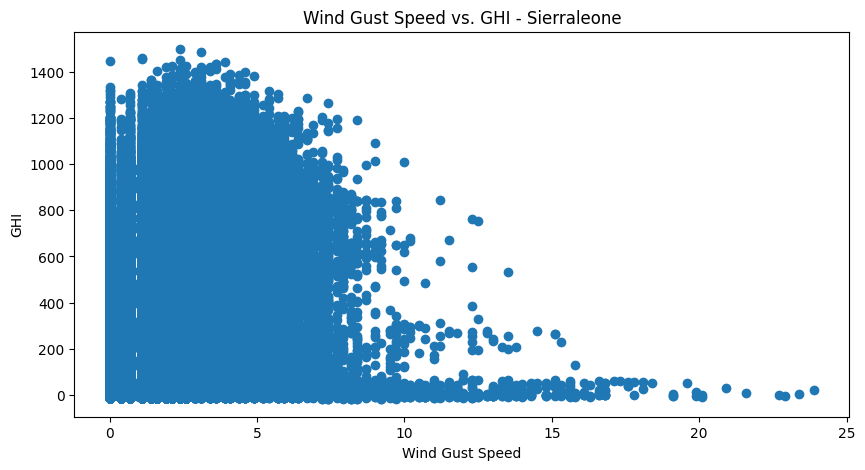

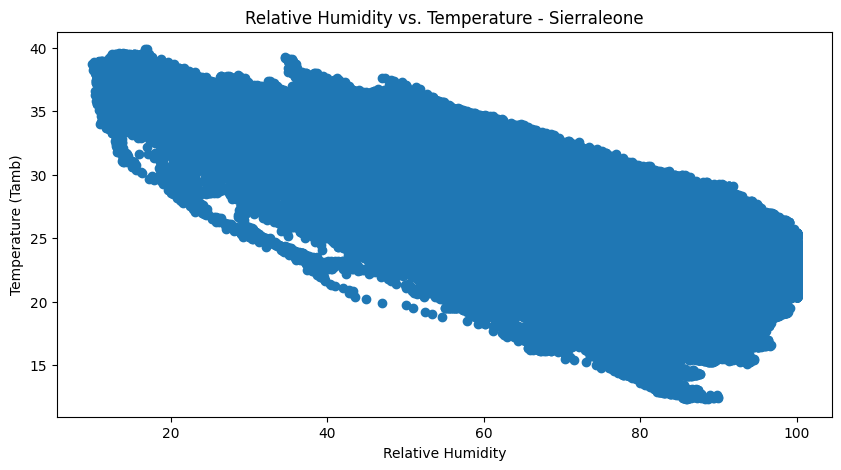

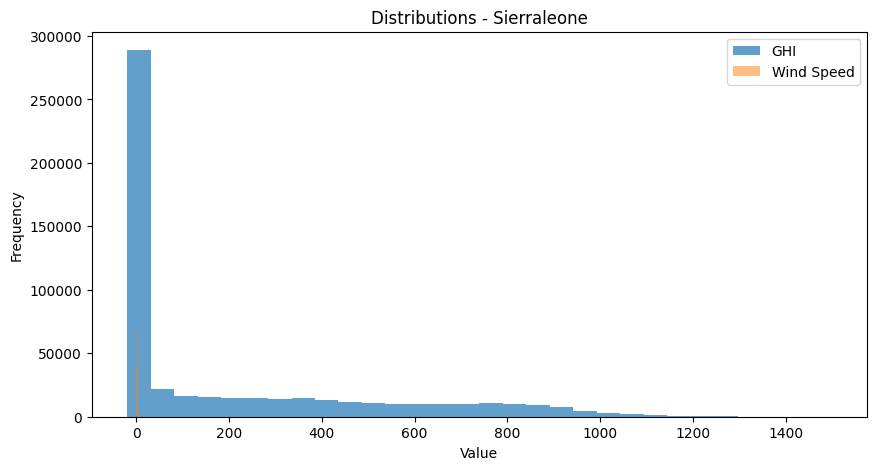

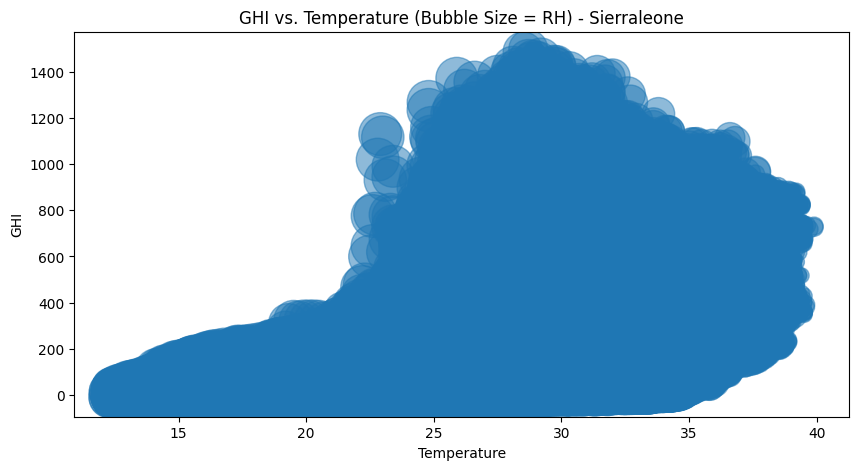


Analyzing Togo Dataset:

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


countries = {
    'benin': '../data/benin-malanville.csv',
    'sierraleone': '../data/sierraleone-bumbuna.csv',
    'togo': '../data/togo-dapaong_qc.csv'
}

for country, filepath in countries.items():
    print(f"\nAnalyzing {country.capitalize()} Dataset:\n")
    
    
    df = pd.read_csv(filepath)

    # Step 1: Summary Statistics & Missing-Value Report
    summary_stats = df.describe()
    missing_values = df.isna().sum()
    high_nulls = missing_values[missing_values > 0.05 * len(df)]

    print("Summary Statistics:")
    print(summary_stats)
    print("\nMissing Values:")
    print(high_nulls)

    # Droping the 'Comments' column if it's not needed
    if 'Comments' in df.columns:
        df.drop(columns=['Comments'], inplace=True)

    # Step 2: Outlier detection & Basic Cleaning
    # Compute Z-scores
    z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']], nan_policy='omit')
    df['outlier'] = (abs(z_scores) > 3).any(axis=1)

    # Handle missing values - only on numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # export cleaned data
    df.to_csv(f'../data/{country}_clean.csv', index=False)

    # Step 3: Time Series Analysis
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['GHI'], label='GHI')
    plt.plot(df['Timestamp'], df['DNI'], label='DNI')
    plt.plot(df['Timestamp'], df['DHI'], label='DHI')
    plt.xlabel('Time')
    plt.ylabel('Solar Radiation')
    plt.title(f'Solar Radiation Over Time - {country.capitalize()}')
    plt.legend(loc='upper left')  # Set a fixed legend location
    plt.show()

    # Step 4: Cleaning Impact
    avg_mods = df.groupby('outlier')[['ModA', 'ModB']].mean()
    avg_mods.plot(kind='bar')
    plt.title(f'Average ModA & ModB Pre/Post-Clean - {country.capitalize()}')
    plt.ylabel('Average Values')
    plt.show()

    # Step 5: Correlation & Relationship Analysis
    correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap - {country.capitalize()}')
    plt.show()

    # scatter plots
    plt.figure(figsize=(10, 5))
    plt.scatter(df['WS'], df['GHI'])
    plt.xlabel('Wind Speed')
    plt.ylabel('GHI')
    plt.title(f'Wind Speed vs. GHI - {country.capitalize()}')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.scatter(df['WSgust'], df['GHI'])
    plt.xlabel('Wind Gust Speed')
    plt.ylabel('GHI')
    plt.title(f'Wind Gust Speed vs. GHI - {country.capitalize()}')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.scatter(df['RH'], df['Tamb'])
    plt.title(f'Relative Humidity vs. Temperature - {country.capitalize()}')
    plt.xlabel('Relative Humidity')
    plt.ylabel('Temperature (Tamb)')
    plt.show()

    # Step 6: Wind & Distribution Analysis
    plt.figure(figsize=(10, 5))
    plt.hist(df['GHI'], bins=30, alpha=0.7, label='GHI')
    plt.hist(df['WS'], bins=30, alpha=0.5, label='Wind Speed')
    plt.title(f'Distributions - {country.capitalize()}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')  # Set a fixed legend location
    plt.show()

    # Step 7: Temperature Analysis
    plt.figure(figsize=(10, 5))
    plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
    plt.xlabel('Temperature')
    plt.ylabel('GHI')
    plt.title(f'GHI vs. Temperature (Bubble Size = RH) - {country.capitalize()}')
    plt.show()